In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
cols = ["letter","x-box","y-box","width","high","onpix","x-bar","y-bar","x2bar","y2bar","xybar","x2ybr","xy2br","x-ege","xegvy","y-ege","yegv"]
ds = pd.read_csv("D:\D\PICT\Datasets\letter-recognition.data",header=None)
ds.columns = cols
ds.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegv
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:
ds.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegv
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


<Axes: xlabel='letter', ylabel='count'>

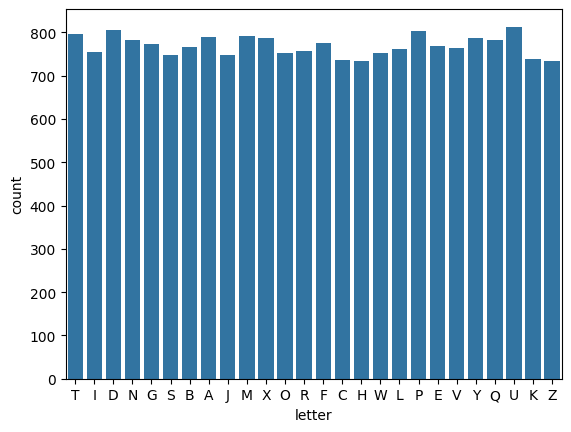

In [11]:
sns.countplot(data=ds,x="letter")

In [12]:
from sklearn.model_selection import train_test_split
features = ds.drop(["letter"],axis=1)
labels = ds["letter"]

features = (features - features.mean())/features.std()
features = features.values.astype(np.float32)

labels = pd.get_dummies(labels,dtype=np.float32)
labels = labels.values
print("features: ",labels.shape,labels.dtype)

x_train,x_test,y_train,y_test = train_test_split(features,labels, test_size=0.33)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

n_features = x_train.shape[1]
n_labels = y_train.shape[1]

features:  (20000, 26) float32
(13400, 16)
(6600, 16)
(13400, 26)
(6600, 26)


In [13]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(32,64,32,16),
                    activation="relu",
                    solver="adam",
                    alpha=0.0001,
                    batch_size=16,
                    max_iter=30,
                    random_state=42,
                    verbose=True)

clf.fit(x_train,y_train)

Iteration 1, loss = 4.20288876
Iteration 2, loss = 1.80316630
Iteration 3, loss = 1.43954961
Iteration 4, loss = 1.23968136
Iteration 5, loss = 1.10066058
Iteration 6, loss = 0.99871537
Iteration 7, loss = 0.91166276
Iteration 8, loss = 0.85022006
Iteration 9, loss = 0.79468431
Iteration 10, loss = 0.74508573
Iteration 11, loss = 0.70493798
Iteration 12, loss = 0.66941295
Iteration 13, loss = 0.62970414
Iteration 14, loss = 0.59927412
Iteration 15, loss = 0.56660088
Iteration 16, loss = 0.54649470
Iteration 17, loss = 0.52055440
Iteration 18, loss = 0.49881614
Iteration 19, loss = 0.48500351
Iteration 20, loss = 0.45665973
Iteration 21, loss = 0.44654542
Iteration 22, loss = 0.43066554
Iteration 23, loss = 0.41457731
Iteration 24, loss = 0.40232893
Iteration 25, loss = 0.38557349
Iteration 26, loss = 0.38613985
Iteration 27, loss = 0.36019583
Iteration 28, loss = 0.35196535
Iteration 29, loss = 0.34997920
Iteration 30, loss = 0.33806178


c:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=16, hidden_layer_sizes=(32, 64, 32, 16), max_iter=30,
              random_state=42, verbose=True)

In [14]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
y_pred = np.argmax(y_test,axis=1)
test_y = np.argmax(y_test,axis=1)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00       272
           4       1.00      1.00      1.00       280
           5       1.00      1.00      1.00       264
           6       1.00      1.00      1.00       264
           7       1.00      1.00      1.00       255
           8       1.00      1.00      1.00       234
           9       1.00      1.00      1.00       242
          10       1.00      1.00      1.00       253
          11       1.00      1.00      1.00       258
          12       1.00      1.00      1.00       255
          13       1.00      1.00      1.00       242
          14       1.00      1.00      1.00       259
          15       1.00      1.00      1.00       263
          16       1.00      1.00      1.00       283
          17       1.00    